In [1]:
#supress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
import os
_stderr = sys.stderr
null = open(os.devnull,'wb')


import os
work_dir = 'Processed_data'


import scanpy as sc
#set some figure parameters for nice display inside jupyternotebooks.
%matplotlib inline
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(5, 5), facecolor='white')

#make a directory for to store the processed scRNA-seq data.
if not os.path.exists(os.path.join(work_dir, 'scRNA')):
    os.makedirs(os.path.join(work_dir, 'scRNA'))
    

import sys
!{sys.executable} -m pip -q install palantir fa2

import warnings
warnings.filterwarnings("ignore")
from anndata import AnnData
import numpy as np
import pandas as pd
import scanpy as sc
import scFates as scf
import palantir
import matplotlib.pyplot as plt
sc.settings.verbosity = 3
sc.settings.logfile = sys.stdout
## fix palantir breaking down some plots
import seaborn
seaborn.reset_orig()
%matplotlib inline

sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(5, 5), facecolor='white')

sc._settings.ScanpyConfig(n_jobs = 44)  
adata = sc.read_h5ad(os.path.join(work_dir, 'scRNA/Step1f_cleaned_annotated.h5ad'))

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


In [2]:
adata

AnnData object with n_obs × n_vars = 8575 × 8108
    obs: 'stage', 'SampleID', 'region', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT', 'total_counts_RPS', 'pct_counts_RPS', 'total_counts_RPL', 'pct_counts_RPL', 'doublet_score', 'predicted_doublet', 'leiden', 'celltype'
    var: 'MT', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'RPS', 'RPL', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'SampleID_colors', 'celltype_colors', 'draw_graph', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'region_colors', 'stage_colors', 'umap'
    obsm: 'X_draw_graph_fa', 'X_palantir', 'X_pca', 'X_pca2d', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [3]:
adata = adata.raw.to_adata()

In [4]:
adata

AnnData object with n_obs × n_vars = 8575 × 36601
    obs: 'stage', 'SampleID', 'region', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT', 'total_counts_RPS', 'pct_counts_RPS', 'total_counts_RPL', 'pct_counts_RPL', 'doublet_score', 'predicted_doublet', 'leiden', 'celltype'
    uns: 'SampleID_colors', 'celltype_colors', 'draw_graph', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'region_colors', 'stage_colors', 'umap'
    obsm: 'X_draw_graph_fa', 'X_palantir', 'X_pca', 'X_pca2d', 'X_umap'
    obsp: 'connectivities', 'distances'

In [5]:
EPOP = adata

In [6]:
EPOP.obs
EPOP.obs.to_csv(os.path.join(work_dir, 'scRNA/Step1f_with_specialized_drawedgraph_metadata.csv'), index=True)

In [7]:
del EPOP.var
del EPOP.obs
del EPOP.layers
del EPOP.obsp
del EPOP.varm
del EPOP.uns

In [8]:
EPOP

AnnData object with n_obs × n_vars = 8575 × 36601
    obsm: 'X_draw_graph_fa', 'X_palantir', 'X_pca', 'X_pca2d', 'X_umap'

In [9]:
results_file = (os.path.join(work_dir, 'scRNA/Step1f_with_specialized_drawedgraph_cleantoseurat_20231008.h5ad'))
EPOP.write(results_file)

In [1]:
### switch to R kernel
library(Seurat)
library(SeuratDisk)

Attaching SeuratObject

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat



In [2]:
Convert("Processed_data/scRNA/Step1f_with_specialized_drawedgraph_cleantoseurat_20231008.h5ad", dest = "h5seurat", overwrite = TRUE)

Warning message:
“Unknown file type: h5ad”
Warning message:
“'assay' not set, setting to 'RNA'”
Creating h5Seurat file for version 3.1.5.9900

Adding X as data

Adding X as counts

Adding meta.features from var

Adding X_draw_graph_fa as cell embeddings for draw_graph_fa

Adding X_palantir as cell embeddings for palantir

Adding X_pca as cell embeddings for pca

Adding X_pca2d as cell embeddings for pca2d

Adding X_umap as cell embeddings for umap



In [3]:
pbmc3k <- LoadH5Seurat("Processed_data/scRNA/Step1f_with_specialized_drawedgraph_cleantoseurat_20231008.h5seurat")

Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding feature-level metadata for RNA

Adding reduction draw_graph_fa

Adding cell embeddings for draw_graph_fa

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from draw_graph_fa_ to drawgraphfa_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to drawgraphfa_”
Adding miscellaneous information for draw_graph_fa

Adding reduction palantir

Adding cell embeddings for palantir

Adding miscellaneous information for palantir

Adding reduction pca

Adding cell embeddings for pca

Adding miscellaneous information for pca

Adding reduction pca2d

Adding cell embeddings for pca2d

Adding miscellaneous information for pca2d

Warning message:
“Cannot add objects with duplicate keys (offending key: PC_), setting key to 'pca2d_'”
Adding reduction umap

Adding cell embeddings for umap

Adding misc

In [4]:
pbmc3kmetadata <- read.csv("Processed_data/scRNA/Step1f_with_specialized_drawedgraph_metadata.csv", row.names = 1)
head(pbmc3kmetadata)

,stage,SampleID,region,batch,n_genes,n_genes_by_counts,total_counts,total_counts_MT,pct_counts_MT,total_counts_RPS,pct_counts_RPS,total_counts_RPL,pct_counts_RPL,doublet_score,predicted_doublet,leiden,celltype
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>
AAACCCACAAAGGCTG-2,PCW4,PCW4_wholebody_rep1,whole_body,0,3651,3651,11950,354,2.9623430,1600,13.389121,2180,18.242678,0.03107058,False,0,04_Placode
AAACCCACAAGCCATT-2,PCW4,PCW4_wholebody_rep1,whole_body,0,1681,1681,3803,24,0.6310807,465,12.227189,695,18.275047,0.03752345,False,5,01_Epiblast
AAACCCACATGACACT-2,PCW4,PCW4_wholebody_rep1,whole_body,0,5450,5450,17599,466,2.6478777,1595,9.063015,2231,12.676856,0.05902951,False,2,08_Diencephalon
AAACCCATCGGCTGAC-2,PCW4,PCW4_wholebody_rep1,whole_body,0,8301,8301,53073,2540,4.7858610,5529,10.417727,7748,14.598760,0.05595755,False,6,03_Epidermal
AAACCCATCTGAATGC-2,PCW4,PCW4_wholebody_rep1,whole_body,0,3744,3744,10977,438,3.9901614,1379,12.562631,1971,17.955725,0.04502618,False,0,04_Placode
AAACCCATCTTCTAAC-2,PCW4,PCW4_wholebody_rep1,whole_body,0,6711,6711,26256,297,1.1311700,1873,7.133607,2577,9.814899,0.03035357,False,2,08_Diencephalon


In [5]:
pbmc3k@meta.data <- pbmc3kmetadata

In [6]:
pbmc3k

An object of class Seurat 
36601 features across 8575 samples within 1 assay 
Active assay: RNA (36601 features, 0 variable features)
 5 dimensional reductions calculated: draw_graph_fa, palantir, pca, pca2d, umap

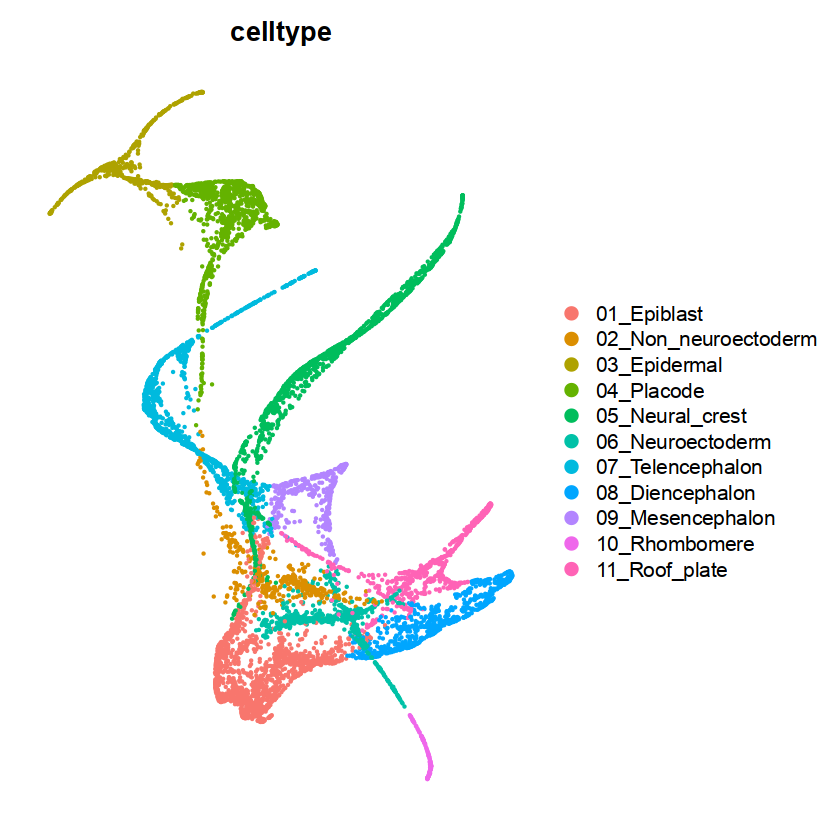

In [7]:
DimPlot(pbmc3k, group.by = "celltype", reduction = "draw_graph_fa") & NoAxes()

In [8]:
pbmc3k <- NormalizeData(pbmc3k, normalization.method = "LogNormalize", scale.factor = 10000)
all.genes <- rownames(pbmc3k)
pbmc3k <- ScaleData(pbmc3k, features = all.genes)

Centering and scaling data matrix



In [9]:
saveRDS(pbmc3k, "Processed_data/scRNA/Step1f_cleaned_annotated.rds")

In [ ]:
suppressMessages(library(Seurat))
suppressMessages(library(dittoSeq))

In [ ]:
pbmc <- readRDS("Processed_data/scRNA/Step1f_cleaned_annotated.rds")

In [ ]:
'#ffb347', #00_Placode
                          '#b4cbf0', #01_Surface_ectoderm
                          '#c6dec7', #02_Neuroectoderm1
                          '#29ab87', #03_Neuroectoderm2_TTC6
                          '#9cded6', #04_Neural_crest
                          '#aaae75', #05_Neuronal
                          '#c7c7c7', #06_Mesoderm1
                          '#828282'  #07_Mesoderm2_TPM1

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)

dittoBarPlot(
    object = pbmc,
    var = "celltype",
    color.panel = c('#ffb347', #00_Placode
                          '#b4cbf0', #01_Surface_ectoderm
                          '#c6dec7', #02_Neuroectoderm1
                          '#29ab87', #03_Neuroectoderm2_TTC6
                          '#9cded6', #04_Neural_crest
                          '#aaae75', #05_Neuronal
                          '#c7c7c7', #06_Mesoderm1
                          '#828282'  #07_Mesoderm2_TPM1
                   ),
    group.by = "SampleID")
  #  x.reorder = c(6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,35,34,36,1,2,3,4,5))

In [ ]:
table(pbmc@meta.data$SampleID)

In [ ]:
table(pbmc@meta.data$SampleID, pbmc@meta.data$celltype)

## 

In [ ]:
suppressMessages(library(Seurat))
suppressMessages(library(dittoSeq))
suppressMessages(library(EnhancedVolcano))
suppressMessages(library(ggrepel))
suppressMessages(library(dplyr))

In [ ]:
pbmc <- readRDS("Processed_data/scRNA/Step1e4_refined_drawedgraph_20231008.rds")

In [ ]:
DimPlot(pbmc, group.by = "celltype", reduction = "umap", label = TRUE) & NoAxes()

In [ ]:
table(pbmc@meta.data$SampleID, pbmc@meta.data$celltype)

In [ ]:
pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 10000, verbose = FALSE)

all.genes <- rownames(pbmc)
pbmc <- ScaleData(pbmc, features = all.genes, verbose = FALSE)


In [ ]:
Idents(pbmc) <- "celltype"
cluster0 <- subset(pbmc, idents = c("01_Surface_ectoderm"))
Idents(cluster0) <- "SampleID"
DEGs_all_surface_ectoderm <- FindAllMarkers(object = cluster0,
                               only.pos = FALSE,
                               logfc.threshold = 0.1,
                               min.pct = 0.01,
                               test.use = 'wilcox')

#DEGs_all <- DEGs_all %>% filter(cluster == "Ctrl_E85" | cluster == "Tbx1KO_E85")
VlnPlot(cluster0, features = c("SIX1", 'SIX4', 'SIX6', 'EYA1', 'EYA2'))

DEGs_all_surface_ectoderm %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1) %>%
    slice_head(n = 50) %>%
    ungroup() -> top10
DoHeatmap(cluster0, features = top10$gene, slot = 'scale.data') + NoLegend()


EnhancedVolcano(`DEGs_all_surface_ectoderm`,
                lab = rownames(`DEGs_all_surface_ectoderm`),
                title = "cluster0 Ctrl vs Tbx1KO",
                x = 'avg_log2FC',
                y = 'p_val_adj',
                xlim = c(-2, 2),
                ylim = c(0, 50),
                axisLabSize = 6,
                labSize = 3,
                titleLabSize = 10,
                pointSize = 6,
                pCutoff = 10e-3,
                FCcutoff = 1,
                col=c('grey80', 'grey80', 'grey80', 'orange2'),
                drawConnectors = TRUE)

In [ ]:
Idents(pbmc) <- "celltype"
cluster0 <- subset(pbmc, idents = c("00_Placode"))
Idents(cluster0) <- "SampleID"
DEGs_all_Placode <- FindAllMarkers(object = cluster0,
                               only.pos = FALSE,
                               logfc.threshold = 0.1,
                               min.pct = 0.01,
                               test.use = 'wilcox')

VlnPlot(cluster0, features = c("SIX1", 'SIX4', 'SIX6', 'EYA1', 'EYA2'))

#DEGs_all <- DEGs_all %>% filter(cluster == "Ctrl_E85" | cluster == "Tbx1KO_E85")

DEGs_all_Placode %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1) %>%
    slice_head(n = 50) %>%
    ungroup() -> top10
DoHeatmap(cluster0, features = top10$gene, slot = "scale.data") + NoLegend()


EnhancedVolcano(`DEGs_all_Placode`,
                lab = rownames(`DEGs_all_Placode`),
                title = "cluster0 Ctrl vs Tbx1KO",
                x = 'avg_log2FC',
                y = 'p_val_adj',
                xlim = c(-2, 2),
                ylim = c(0, 50),
                axisLabSize = 6,
                labSize = 3,
                titleLabSize = 10,
                pointSize = 6,
                pCutoff = 10e-3,
                FCcutoff = 1,
                col=c('grey80', 'grey80', 'grey80', 'orange2'),
                drawConnectors = TRUE)

In [ ]:
Idents(pbmc) <- "celltype"
cluster0 <- subset(pbmc, idents = c("01_Surface_ectoderm", "00_Placode"))
Idents(cluster0) <- "SampleID"
DEGs_all_surface_ectoderm_Placode <- FindAllMarkers(object = cluster0,
                               only.pos = FALSE,
                               logfc.threshold = 0.1,
                               min.pct = 0.01,
                               test.use = 'wilcox')

#DEGs_all <- DEGs_all %>% filter(cluster == "Ctrl_E85" | cluster == "Tbx1KO_E85")

DEGs_all_surface_ectoderm_Placode %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1) %>%
    slice_head(n = 50) %>%
    ungroup() -> top10
DoHeatmap(cluster0, features = top10$gene, slot = 'scale.data') + NoLegend()


EnhancedVolcano(`DEGs_all_surface_ectoderm_Placode`,
                lab = rownames(`DEGs_all_surface_ectoderm_Placode`),
                title = "cluster0 Ctrl vs Tbx1KO",
                x = 'avg_log2FC',
                y = 'p_val_adj',
                xlim = c(-2, 2),
                ylim = c(0, 50),
                axisLabSize = 6,
                labSize = 3,
                titleLabSize = 10,
                pointSize = 6,
                pCutoff = 10e-3,
                FCcutoff = 1,
                col=c('grey80', 'grey80', 'grey80', 'orange2'),
                drawConnectors = TRUE)

In [ ]:
Idents(pbmc) <- "celltype"
cluster0 <- subset(pbmc, idents = c("02_Neuroectoderm1"))
Idents(cluster0) <- "SampleID"
DEGs_02_Neuroectoderm1 <- FindAllMarkers(object = cluster0,
                               only.pos = FALSE,
                               logfc.threshold = 0.1,
                               min.pct = 0.01,
                               test.use = 'wilcox')

#DEGs_all <- DEGs_all %>% filter(cluster == "Ctrl_E85" | cluster == "Tbx1KO_E85")

DEGs_02_Neuroectoderm1 %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1) %>%
    slice_head(n = 50) %>%
    ungroup() -> top10
DoHeatmap(cluster0, features = top10$gene, slot = "scale.data") + NoLegend()


EnhancedVolcano(`DEGs_02_Neuroectoderm1`,
                lab = rownames(`DEGs_02_Neuroectoderm1`),
                title = "cluster0 Ctrl vs Tbx1KO",
                x = 'avg_log2FC',
                y = 'p_val_adj',
                xlim = c(-2, 2),
                ylim = c(0, 50),
                axisLabSize = 6,
                labSize = 3,
                titleLabSize = 10,
                pointSize = 6,
                pCutoff = 10e-3,
                FCcutoff = 1,
                col=c('grey80', 'grey80', 'grey80', 'orange2'),
                drawConnectors = TRUE)

In [ ]:
write.table(DEGs_all_surface_ectoderm, "Processed_data/scRNA/DEGs_all_surface_ectoderm.tsv", sep = '\t')

In [ ]:
write.table(DEGs_all_Placode, "Processed_data/scRNA/DEGs_all_Placode.tsv", sep = '\t')

In [ ]:
write.table(DEGs_all_surface_ectoderm_Placode, "Processed_data/scRNA/DEGs_all_surface_ectoderm_Placode.tsv", sep = '\t')

In [ ]:
write.table(DEGs_02_Neuroectoderm1, "Processed_data/scRNA/DEGs_02_Neuroectoderm1.tsv", sep = '\t')